# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_DF=pd.merge(mouse_metadata, study_results, how="right")

# Display the data table for preview
mouse_DF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [16]:
# Checking the number of mice.
number_of_mice = len(mouse_DF["Mouse ID"].unique())
print(f"Number of mice: {number_of_mice}")

Number of mice: 249


In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_DF.loc[mouse_DF.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print (f"Duplicate Mice ID: {duplicate_mice_ID}")

Duplicate Mice ID: ['g989']


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_DF[mouse_DF.duplicated(["Mouse ID",])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
250,a275,Ceftamin,Female,20,28,5,46.795257,0
251,w575,Zoniferol,Female,16,28,5,48.913860,1
252,x822,Ceftamin,Male,3,29,5,45.671104,1
253,l509,Capomulin,Male,17,21,5,45.851193,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_DF.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [20]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_data["Mouse ID"].unique())
clean_mice

249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = mouse_DF.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = mouse_DF.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = mouse_DF.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance

regimen_stdev = mouse_DF.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_stdev

regimen_sem = mouse_DF.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Total Volume Mean": regimen_mean, "Total Volume Median": regimen_median, "Total Volume Variance":regimen_variance,
                             "Total Volume Standard Deviation": regimen_stdev, "Total Volume SEM":regimen_sem})
summary_stats

,Total Volume Mean,Total Volume Median,Total Volume Variance,Total Volume Standard Deviation,Total Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats1 = mouse_DF.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats1 = summary_stats1.rename(columns={"mean": "Mean","median": "Median", "var": "Variance",
                                               "std": "Standard Devation", "sem": "SEM"})
summary_stats1

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2243506110.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats1 = mouse_DF.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Devation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

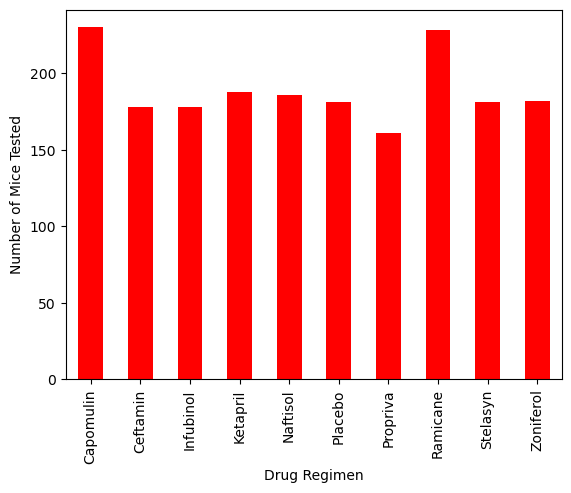

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_per_drug= mouse_DF.groupby(["Drug Regimen"]).count()["Mouse ID"]
pandas_plot = mice_per_drug.plot(kind="bar", color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
mice_per_drug

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arrange(len(mice_per_drug))
tick_locations = []

AttributeError: module 'numpy' has no attribute 'arrange'

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_rows = mouse_DF.loc[:,["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count=gender_rows["Sex"].value_counts()
gender_data = pd.DataFrame({"Total Count": gender_count})
colors = ["blue", "orange"]
explode = (0.1,0)
pandas_pie=gender_data.plot(kind="pie",colors=colors,y="Sex")
plt.axis("equal")
plt.show()
gender_data


KeyError: 'Sex'

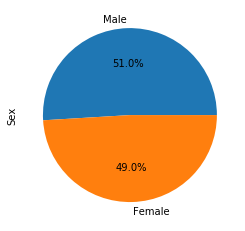

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_DF.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data_timepoint =last_timepoint.merge(mouse_DF, on=["Mouse ID", "Timepoint"], how="left")
merge_data_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)

treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merge_data_timepoint.loc[merge_data_timepoint["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.concat(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq= quartiles[.25]
    upperq= quartiles[.75]
    iqr= upperq - lowerq
    
    upper_bound= upperq+(1.5*iqr)
    lower_bound = lowerq-(1.5*iqr)
    outliers=tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

AttributeError: 'Series' object has no attribute 'concat'

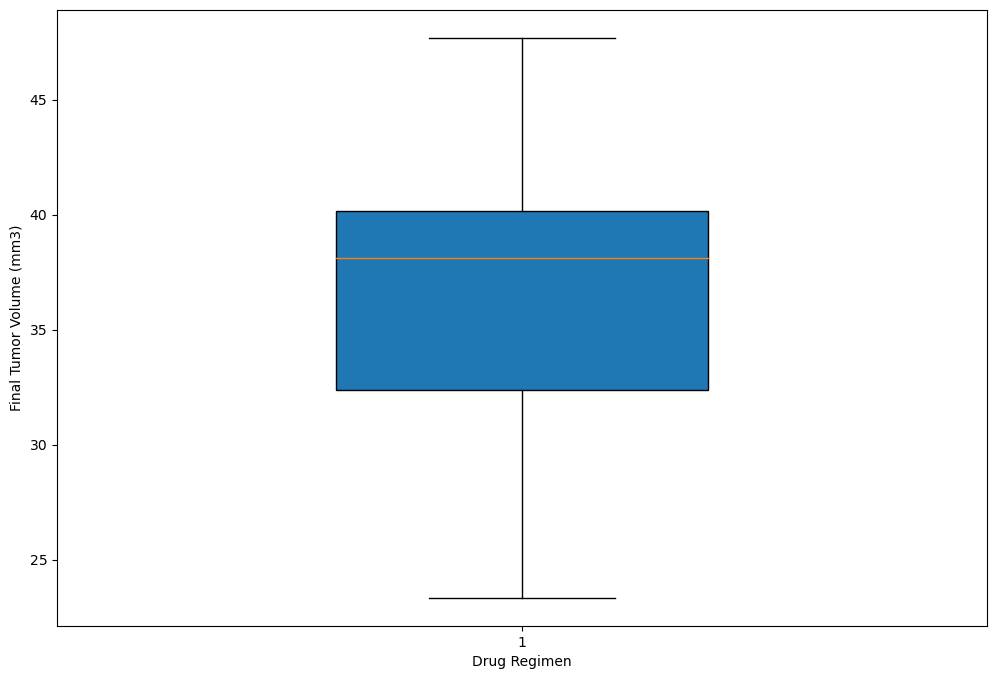

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(12,8))

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol, widths=0.4, patch_artist=True, vert=True)
plt.show()

## Line and Scatter Plots

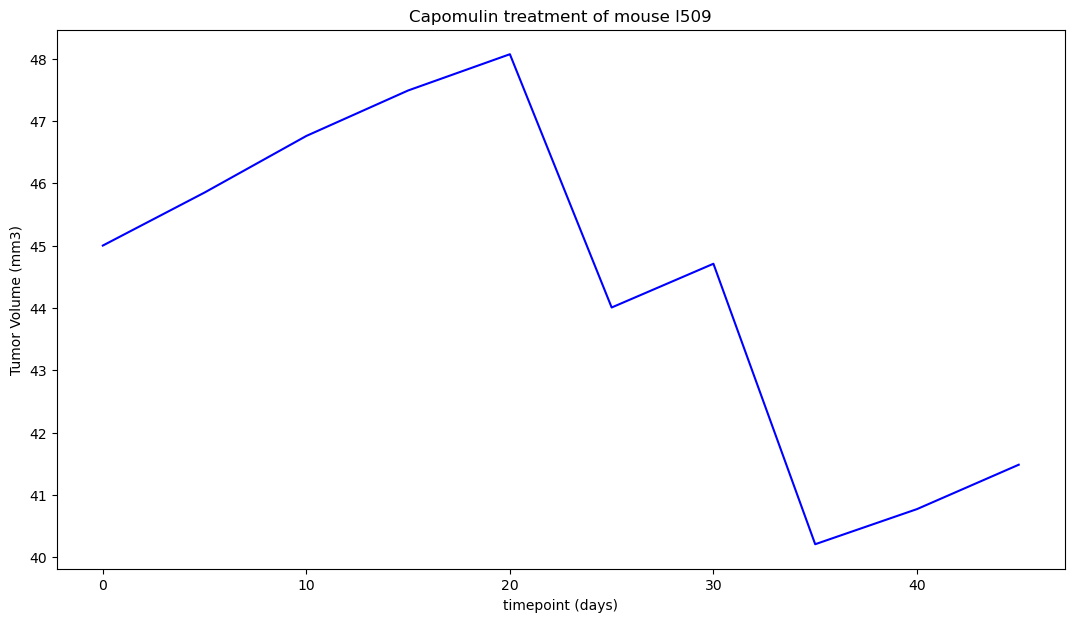

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_DF.loc[mouse_DF["Drug Regimen"]=="Capomulin",:]
capomulin_df

mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509",:]
mouse_capomulin

x_axis = mouse_capomulin["Timepoint"]
tumor_volume= mouse_capomulin["Tumor Volume (mm3)"]

fig1, ax1= plt.subplots(figsize=(13,7))
plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, tumor_volume, color="blue")
plt.xlabel("timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

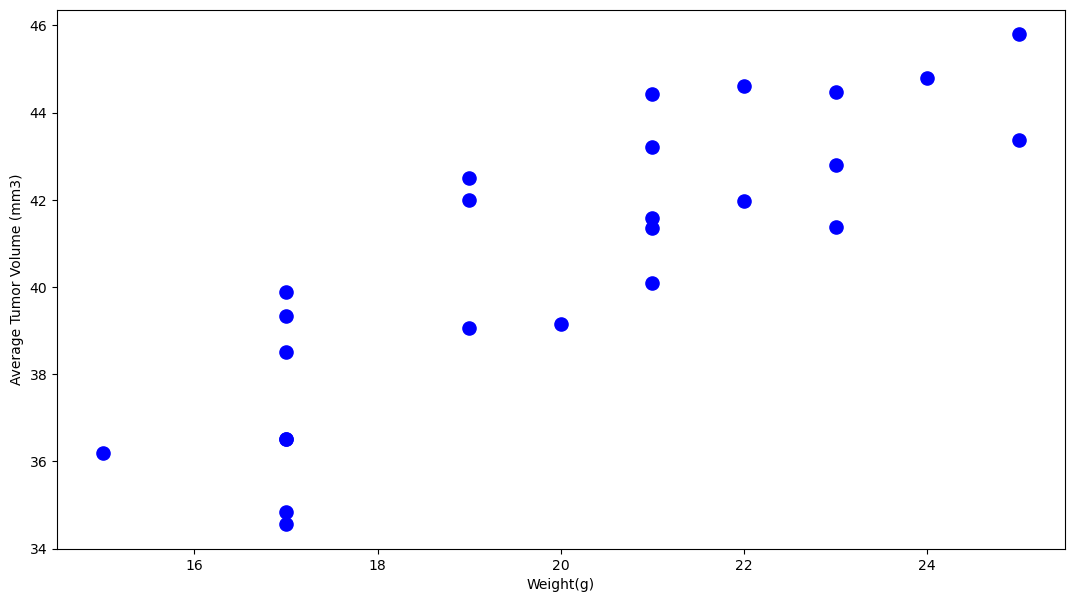

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_DF.loc[mouse_DF["Drug Regimen"]=="Capomulin",:]
capomulin_df
avg_capomulin = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize= (13,7))
marker_size=14
plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'], s=90, color="blue")
plt.xlabel ("Weight(g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

NameError: name 'regress_values' is not defined

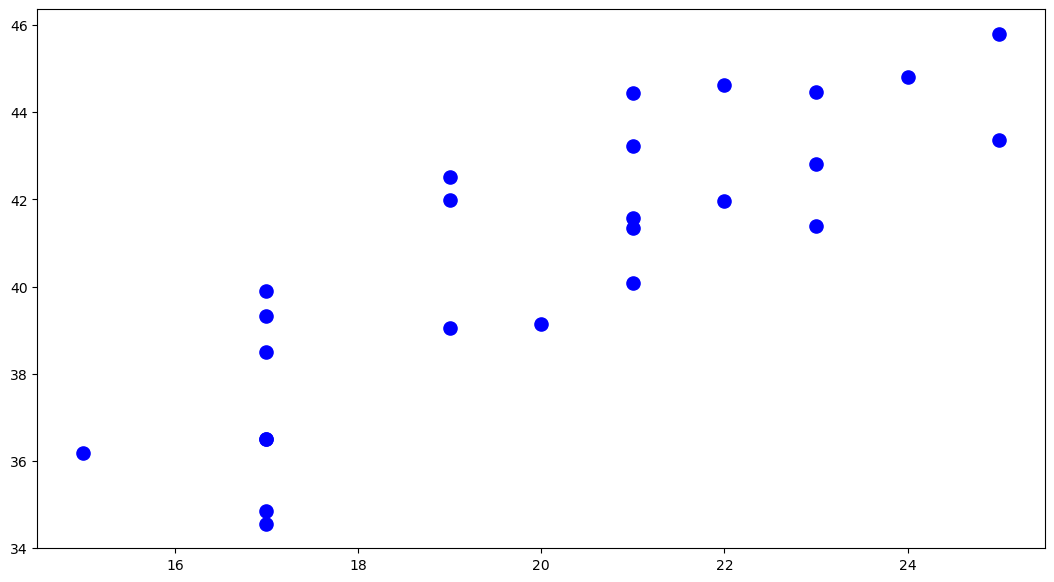

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_capomulin['Weight (g)']
y_values= avg_capomulin['Tumor Volume (mm3)']


fig1, ax1 = plt.subplots(figsize=(13,7))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values, "r-")
plt.title("The correlation between mouse weight and the average tumor volume is 0.84")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
